# CREAR DATASET

In [1]:
import os
import mediapipe as mp
import cv2 

import pickle

In [2]:
#import matplotlib.pyplot as plt

In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode = True, min_detection_confidence = 0.3 )



In [4]:
DATA_DIR = './fotos'

data = []
labels = []

for subcarpeta in os.listdir(DATA_DIR):
    subcarpeta_path = os.path.join(DATA_DIR, subcarpeta)
    if os.path.isdir(subcarpeta_path):  # Asegúrate de que es una subcarpeta
        for letra_carpeta in os.listdir(subcarpeta_path):
            letra_carpeta_path = os.path.join(subcarpeta_path, letra_carpeta)
            if os.path.isdir(letra_carpeta_path):  # Asegúrate de que es una subcarpeta
                for img_name in os.listdir(letra_carpeta_path):
                    img_path = os.path.join(letra_carpeta_path, img_name)
                    if os.path.isfile(img_path):  # Asegúrate de que es un archivo
                        data_aux = []

                        # Leer la imagen
                        img = cv2.imread(img_path)
                        if img is not None:  # Asegúrate de que la imagen se ha leído correctamente
                            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                            # Procesar la imagen con mediapipe
                            results = hands.process(img_rgb)
                            if results.multi_hand_landmarks:
                                for hand_landmarks in results.multi_hand_landmarks:
                                    for i in range(len(hand_landmarks.landmark)):
                                        x = hand_landmarks.landmark[i].x
                                        y = hand_landmarks.landmark[i].y
                                        data_aux.append(x)
                                        data_aux.append(y)

                                # Asegúrate de que tienes las 42 coordenadas (21 puntos de referencia, cada uno con x e y)
                                if len(data_aux) == 42:
                                    data.append(data_aux)
                                    labels.append(letra_carpeta)

# Cerrar el objeto mediapipe
hands.close()

print(f'Total imágenes procesadas: {len(data)}')
print(f'Ejemplo de datos: {data[:1]}')
print(f'Ejemplo de etiquetas: {labels[:1]}')

c:\Users\dsanc\Desktop\SAILearning\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
DATA_DIR = './data'

data = []
labels = []

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []
        
        img = cv2.imread(os.path.join(os.path.join(DATA_DIR, dir_, img_path)))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)
            
            if len(data_aux) == 42:        
                data.append(data_aux)
                labels.append(dir_)
                


ValueError: _graph is None in SolutionBase

In [ ]:
#creo un archivo con los datos con la librria pickle
f = open('data5.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

# ENTRENAR EL CLASIFICADOR

In [ ]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

In [ ]:
import pandas as pd

In [ ]:
data_dict = pickle.load(open('./data5.pickle', 'rb'))
print(data_dict.keys())
print(data_dict)

dict_keys(['data', 'labels'])
{'data': [[0.6331011056900024, 0.7055613994598389, 0.5735215544700623, 0.6630396842956543, 0.534870982170105, 0.5846638083457947, 0.5178770422935486, 0.5162122845649719, 0.4968343675136566, 0.46708405017852783, 0.5633983612060547, 0.5334503054618835, 0.556717574596405, 0.49775826930999756, 0.5690021514892578, 0.5551312565803528, 0.5763521194458008, 0.595712423324585, 0.5989370346069336, 0.5313122272491455, 0.5899022817611694, 0.5027496814727783, 0.5987167954444885, 0.5763900279998779, 0.6050621867179871, 0.6186800003051758, 0.6331714987754822, 0.5371836423873901, 0.6249260902404785, 0.5126658082008362, 0.6247013211250305, 0.5834395289421082, 0.6265588402748108, 0.6273403167724609, 0.6661133766174316, 0.5464836955070496, 0.6591864824295044, 0.5190125107765198, 0.6506854891777039, 0.565496027469635, 0.6479631066322327, 0.5952976942062378], [0.6287522315979004, 0.7998944520950317, 0.565942108631134, 0.7455332279205322, 0.5254679918289185, 0.6516127586364746, 

In [ ]:
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, shuffle = True, stratify = labels)

## RANDOM FOREST

In [ ]:
#fit
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

score = accuracy_score(y_predict, y_test)
print(f'Score: {score}')


Score: 0.8298279158699808


In [ ]:
#gaurdar el modelo
m = open('model_completo.p', 'wb')
pickle.dump({'model_completo': model}, m)
m.close()

## SVM

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = accuracy_score(y_predict, y_test)
print(f'Score: {score}')

Score: 0.7820267686424475


## GB

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = accuracy_score(y_predict, y_test)
print(f'Score: {score}')

Score: 0.8183556405353728


## REDES

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = accuracy_score(y_predict, y_test)
print(f'Score: {score}')

Score: 0.8068833652007649


In [ ]:
#gaurdar el modelo
m = open('model_nn.p', 'wb')
pickle.dump({'model': model}, m)
m.close()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np


In [ ]:

# Supongamos que ya tienes tus datos divididos en X_train, X_test, y_train, y_test

# Definir el modelo
model = MLPClassifier(max_iter=1000)

# Definir los hiperparámetros a buscar
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ejecutar el Grid Search
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f'Best parameters found: {grid_search.best_params_}')

# Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
y_predict = best_model.predict(X_test)
score = accuracy_score(y_predict, y_test)
print(f'Score: {score}')


In [ ]:
# Definir el modelo con los mejores parámetros encontrados
best_model = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='adaptive', solver='adam', max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_predict = best_model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
score = accuracy_score(y_predict, y_test)
print(f'Score: {score}')

Score: 0.8470209339774557


<Axes: >

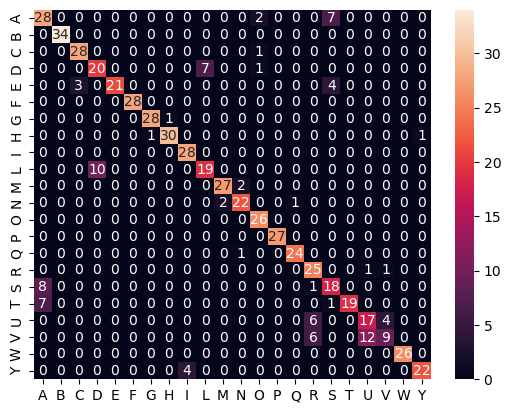

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matriz = confusion_matrix(y_test, y_predict)

import seaborn 

letras_mexicanas = ['A', 'B', 'C', 'D', 'E','F','G', 'H', 'I','L', 'M', 'N', 'O', 'P', 'Q', 'R','S','T','U','V','W','Y']

seaborn.heatmap(conf_matriz,  xticklabels= letras_mexicanas, yticklabels= letras_mexicanas, annot=True)

In [ ]:
#gaurdar el modelo
m = open('model_PRO4.p', 'wb')
pickle.dump({'model': best_model}, m)
m.close()

In [ ]:
best

# GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Definir el clasificador RandomForest
model = RandomForestClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Realizar Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los resultados del Grid Search como un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Ordenar los resultados por puntaje de precisión en orden descendente
results = results.sort_values(by='mean_test_score', ascending=False)

# Obtener los mejores 10 resultados
top_10_results = results.head(10)
print("Top 10 mejores resultados:")
top_10_results[['params', 'mean_test_score', 'std_test_score']]


KeyboardInterrupt: 

In [ ]:
top_10_results.loc[83, 'params']

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}